# Preprocessing Workflow


🎯 This exercise will guide you through the preprocessing workflow. Step by step, feature by feature, you will investigate the dataset and take preprocessing decisions accordingly.

🌤 We stored the `ML_Houses_dataset.csv` [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv) in the cloud.

👇 Run the code down below to load the dataset and features you will be working with.

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score



# Loading the dataset
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv"
data = pd.read_csv(url)

# Selecting some columns of interest
selected_features = ['GrLivArea',
                     'BedroomAbvGr',
                     'KitchenAbvGr',
                     'OverallCond',
                     'RoofSurface',
                     'GarageFinish',
                     'CentralAir',
                     'ChimneyStyle',
                     'MoSold',
                     'SalePrice']

# Overwriting the "data" variable to keep only the columns of interest
# Notice the .copy() to copy the values
data = data[selected_features].copy()

# Showing the first five rows
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000


📚 Take the time to do a ***preliminary investigation*** of the features by reading the ***dataset description*** available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to refer to it throughout the day.

## (1) Duplicates

ℹ️ ***Duplicates in datasets cause data leakage.*** 

👉 It is important to locate and remove duplicates.

❓ How many duplicated rows are there in the dataset ❓

<i>Save your answer under variable name `duplicate_count`.</i>

In [2]:
duplicate_count = data.duplicated().sum()

print(duplicate_count)

300


❓ Remove the duplicates from the dataset. Overwite the dataframe `data`❓

In [3]:
data = data.drop_duplicates()

print(data.shape)

(1460, 10)


🧪 **Test your code**

In [4]:
from nbresult import ChallengeResult

result = ChallengeResult('duplicates',
                         duplicates = duplicate_count,
                         dataset = data
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/hurley-2nd/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/hurley-2nd/code/hurley27/05-ML/02-Prepare-the-dataset/data-preprocessing-workflow/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 2 items

test_duplicates.py::TestDuplicates::test_dataset_length PASSED           [ 50%]
test_duplicates.py::TestDuplicates::test_duplicate_count PASSED          [100%]

============================== 2 passed in 0.33s ===============================


💯 You can commit your code:

git add tests/duplicates.pickle

git commit -m 'Completed duplicates step'

git push origin master



In [5]:
!git add tests/duplicates.pickle

!git commit -m 'Completed duplicates step'

!git push origin master

On branch master
nothing to commit, working tree clean
Everything up-to-date


## (2) Missing data

❓ Print the percentage of missing values for every column of the dataframe. ❓

In [6]:
missing_percentage = (data.isnull().sum() / len(data)) * 100

print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

GarageFinish    5.547945
RoofSurface     0.616438
dtype: float64


### `GarageFinish`

❓ **Questions** about `GarageFinish` ❓

Investigate the missing values in `GarageFinish`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using `SimpleImputer` from Scikit-Learn
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ According to the dataset description, the missing values in `GarageFinish` represent a house having no garage. They need to be encoded as such.
</details>

In [7]:
garageinfo = data['GarageFinish'].value_counts(dropna = False)
print (garageinfo)

#replace NaN values with 'NoGarage' to reflect houses without garages
data['GarageFinish'] = data['GarageFinish'].replace(np.nan, 'NoGarage')

print (data['GarageFinish'].value_counts(dropna = False))

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64
Unf         605
RFn         422
Fin         352
NoGarage     81
Name: GarageFinish, dtype: int64


### `RoofSurface`

❓ **Questions** about `RoofSurface` ❓

Investigate the missing values in `RoofSurface`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using sklearn's `SimpleImputer`
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ `RoofSurface` has a few missing values that can be imputed by the median value.
</details>

In [8]:
roofinfo = data['RoofSurface'].value_counts(dropna = False)
missingroofinfo = data['RoofSurface'].isnull().sum()

print(roofinfo)
print(f"Missing values: {missingroofinfo}")

imputer = SimpleImputer(strategy='mean')

data['RoofSurface'] = imputer.fit_transform(data[['RoofSurface']])

print(data['RoofSurface'].isnull().sum())

NaN       9
3817.0    5
5016.0    3
2814.0    3
3112.0    3
         ..
3088.0    1
1710.0    1
4709.0    1
3634.0    1
3501.0    1
Name: RoofSurface, Length: 1255, dtype: int64
Missing values: 9
0


### `ChimneyStyle`

❓ **Questions** about `ChimneyStyle` ❓

Investigate the missing values in `ChimneyStyle`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 <i>Hint</i></summary>
    
* ⚠️ Be careful: not all missing values are represented as `np.nans`, and Python's `isnull()` only detects `np.nans`...
    
* ℹ️ `ChimneyStyle` has a lot of missing values. The description does not touch on what they represent. As such, it is better not to make any assumptions and to drop the column entirely.
    

</details>

In [9]:
chimneyinfo = data['ChimneyStyle'].value_counts(dropna = False)
print(chimneyinfo)

chimneymissing = (data['ChimneyStyle'] == '').sum()
print(f"Empty string entries: {chimneymissing}")

data = data.drop(columns='ChimneyStyle')

print('ChimneyStyle' in data.columns)

?           1455
bricks         3
castiron       2
Name: ChimneyStyle, dtype: int64
Empty string entries: 0
False


🧪 **Test your code**

In [10]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = data
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/hurley-2nd/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/hurley-2nd/code/hurley27/05-ML/02-Prepare-the-dataset/data-preprocessing-workflow/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 2 items

test_missing_values.py::TestMissing_values::test_nans PASSED             [ 50%]
test_missing_values.py::TestMissing_values::test_number_of_columns PASSED [100%]

============================== 2 passed in 0.29s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master



In [28]:
!git add tests/missing_values.pickle

!git commit -m 'Completed missing_values step'

!git push origin master

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Preprocessing-Workflow.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
Everything up-to-date


❓ When you are done with handling missing value, print out the percentage of missing values for the entire dataframe ❓

You should no longer have missing values !

In [11]:
#calculate percentage of missing values for each column
missing = data.isnull().mean() * 100

#filter and sort only columns with missing values
missing = missing[missing > 0].sort_values(ascending=False)
print("Columns with missing values and their percentages:")
print(missing)

#calculate total missing percentage across all columns
missingpercentage = data.isnull().mean().sum() * 100
print(f"\nTotal percentage of missing values in the DataFrame: {missingpercentage:.2f}%")

Columns with missing values and their percentages:
Series([], dtype: float64)

Total percentage of missing values in the DataFrame: 0.00%


## (3) Scaling

**First of all, before scaling...**

To understand the effects of scaling and encoding on model performance, let's get a **base score without any data transformation**.

❓ Cross-validate a linear regression model that predicts `SalePrice` using the other features ❓

⚠️ Note that a linear regression model can only handle numeric features. [DataFrame.select_dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) can help.

In [12]:
from sklearn.model_selection import cross_validate

#get numeric features and drop rows with missing values
X = data.drop(columns = 'SalePrice').select_dtypes(include = 'number').dropna()
y = data.loc[X.index, 'SalePrice']

model = LinearRegression()

cv_results = cross_validate(model, X, y, cv=5, scoring='r2', return_train_score=False)

print("R² scores:", cv_results['test_score'])
print("Average R² score:", np.mean(cv_results['test_score']))

R² scores: [0.62648485 0.587693   0.63354401 0.57682958 0.43874743]
Average R² score: 0.5726597740830891


Keep this score in mind! You will train a new model after data preprocessing in Challenge #2 - see if it improves your average score 😉

🚀 Now, back to **feature scaling**!

###  `RoofSurface` 

❓ **Question** about `RoofSurface` ❓

👇 Investigate `RoofSurface` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scaler
2. Robust Scaler
3. MinMax Scaler

Replace the original columns with the transformed values.

In [13]:
data['RoofSurface']

0       1995.0
1        874.0
2       1593.0
3       2566.0
4       3130.0
         ...  
1455    1698.0
1456    2645.0
1457     722.0
1458    3501.0
1459    3082.0
Name: RoofSurface, Length: 1460, dtype: float64

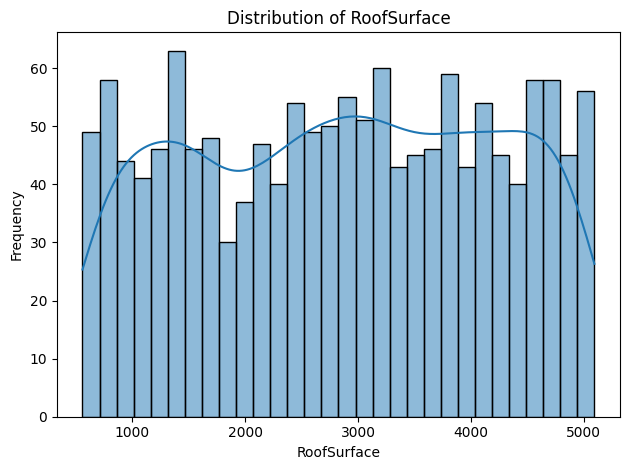

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#plot the distribution of 'RoofSurface'

sns.histplot(data['RoofSurface'], kde = True, bins = 30)
plt.title("Distribution of RoofSurface")
plt.xlabel("RoofSurface")
plt.ylabel("Frequency")
plt.tight_layout()

In [15]:
scaler = MinMaxScaler()
data['RoofSurface'] = scaler.fit_transform(data[['RoofSurface']])

print(data['RoofSurface'].describe())

count    1460.000000
mean        0.508090
std         0.291582
min         0.000000
25%         0.246143
50%         0.513776
75%         0.761406
max         1.000000
Name: RoofSurface, dtype: float64


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ Since `RoofSurface` has neither a Gaussian distribution, nor outliers $\rightarrow$ MinMaxScaler.
</details>

### `GrLivArea`

❓ **Question** about `GrLivArea` ❓

👇 Investigate `GrLivArea` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scaler
2. Robust Scaler
3. MinMax Scaler

Replace the original columns with the transformed values.

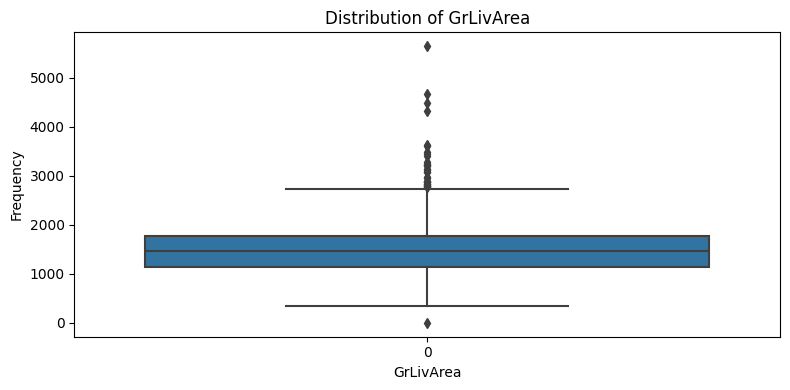

In [16]:
plt.figure(figsize=(8, 4))
sns.boxplot(data['GrLivArea'])
plt.title("Distribution of GrLivArea")
plt.xlabel("GrLivArea")
plt.ylabel("Frequency")
plt.tight_layout()

In [17]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data['GrLivArea'] = scaler.fit_transform(data[['GrLivArea']])

print(data['GrLivArea'].describe())

count    1460.000000
mean        0.078410
std         0.813952
min        -2.263422
25%        -0.516802
50%         0.000000
75%         0.483198
max         6.455002
Name: GrLivArea, dtype: float64


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ `GrLivArea` has many outliers $\rightarrow$ RobustScaler()
</details>

### `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr`

❓ **Questions** about `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr` ❓

👇 Investigate `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr`. Then, chose one of the following scaling techniques:

1. MinMax Scaler
2. Standard Scaler
3. Robust Scaler

Replace the original columns with the transformed values.

<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr` are ordinal features. There are less than 0.1% of outliers so no need to use _RobustScaler()_. The distribution is not Gaussian, hence no _StandardScaler()_. By elimination, you can confidently choose _MinMaxScaler()_.
</details>

In [18]:
data.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,MoSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.078410,2.866438,1.046575,5.575342,0.508090,6.321918,180921.195890
std,0.813952,0.815778,0.220338,1.112799,0.291582,2.703626,79442.502883
min,-2.263422,0.000000,0.000000,1.000000,0.000000,1.000000,34900.000000
25%,-0.516802,2.000000,1.000000,5.000000,0.246143,5.000000,129975.000000
50%,0.000000,3.000000,1.000000,5.000000,0.513776,6.000000,163000.000000
75%,0.483198,3.000000,1.000000,6.000000,0.761406,8.000000,214000.000000
max,6.455002,8.000000,3.000000,9.000000,1.000000,12.000000,755000.000000


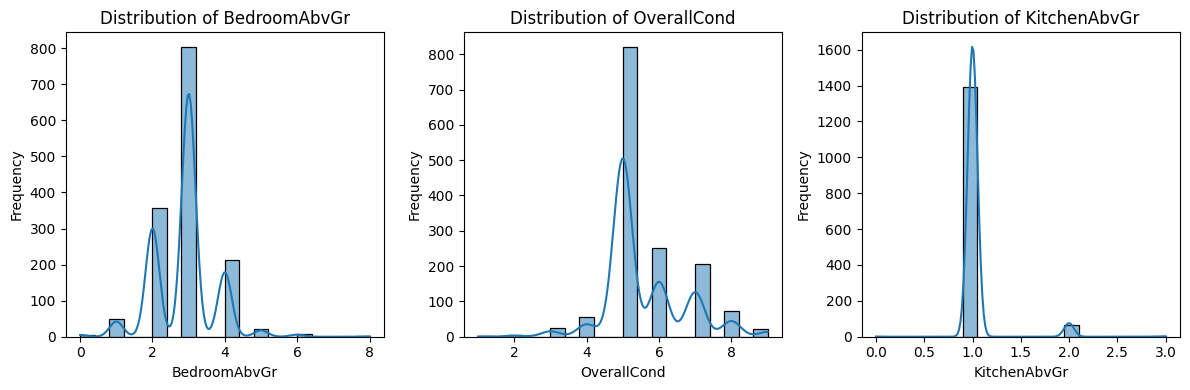

In [19]:
features = ['BedroomAbvGr', 'OverallCond', 'KitchenAbvGr']


#plot
fig, axes = plt.subplots(1, 3, figsize = (12,4))
#fig, axes = plt.subplots(1, 3, figsize=(15, 4))


for i, feature in enumerate(features):
    sns.histplot(data[feature], kde = True, bins = 20, ax = axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()

#scaling with MinMaxScaler
minmax_scaler = MinMaxScaler()
data[features] = minmax_scaler.fit_transform(data[features])



In [20]:
print(data[features].describe())

       BedroomAbvGr  OverallCond  KitchenAbvGr
count   1460.000000  1460.000000   1460.000000
mean       0.358305     0.571918      0.348858
std        0.101972     0.139100      0.073446
min        0.000000     0.000000      0.000000
25%        0.250000     0.500000      0.333333
50%        0.375000     0.500000      0.333333
75%        0.375000     0.625000      0.333333
max        1.000000     1.000000      1.000000


🧪 **Test your code**

In [21]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset=data
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/hurley-2nd/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/hurley-2nd/code/hurley27/05-ML/02-Prepare-the-dataset/data-preprocessing-workflow/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 3 items

test_scaling.py::TestScaling::test_bedroom_kitchen_condition PASSED      [ 33%]
test_scaling.py::TestScaling::test_gr_liv_area PASSED                    [ 66%]
test_scaling.py::TestScaling::test_roof_surface PASSED                   [100%]

============================== 3 passed in 0.31s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master



In [25]:
!git add tests/scaling.pickle

!git commit -m 'Completed scaling step'

!git push origin master

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Preprocessing-Workflow.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
Everything up-to-date


## (4) Feature Encoding

### `GarageFinish`

❓ **Question** about `GarageFinish`❓

👇 Investigate `GarageFinish` and choose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Add the encoding to the dataframe as new colum(s), and remove the original column.


<details>
    <summary>💡 <i>Hint</i></summary>
        
ℹ️ `GarageFinish` is a multicategorical feature that should be One-hot-encoded. You could also consider an Ordinal Encoding but we would have to know for sure that Unfinished or no garage are definitely worse that rough finished!
</details>

In [30]:
# Check unique values in 'GarageFinish'
unique_values = data['GarageFinish'].unique()
unique_values_sorted = sorted(unique_values)
print("Unique values in GarageFinish:", unique_values_sorted)

# One-hot encode 'GarageFinish'
garage_finish_encoded = pd.get_dummies(data['GarageFinish'], prefix='GarageFinish')

# Add the encoded columns to the dataset and drop the original column
data = pd.concat([data.drop(columns='GarageFinish'), garage_finish_encoded], axis=1)

# Preview the new encoded columns
print(garage_finish_encoded.head())

KeyError: 'GarageFinish'

In [29]:
GarageFinish_ohe.get_feature_names_out()

NameError: name 'GarageFinish_ohe' is not defined

### Encoding  `CentralAir`

❓ **Question** about `CentralAir`❓

Investigate `CentralAir` and choose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Replace the original column with the newly generated encoded columns.


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ `CentralAir` is a binary categorical feature.
</details>

In [ ]:
#investigate unique values in 'CentralAir'
central_air_values = data['CentralAir'].unique()
print("Unique values in CentralAir:", central_air_values)

# Apply ordinal encoding: 'Y' → 1, 'N' → 0
data['CentralAir'] = data['CentralAir'].map({'Y': 1, 'N': 0})

# Confirm the transformation
print(data['CentralAir'].value_counts())

## (5) Feature Engineering

### `MoSold` - Cyclical engineering 

👨🏻‍🏫 A feature can be numerical (continuous or discrete), categorical or ordinal. But a feature can also be temporal (e.g. quarters, months, days, minutes, ...). 

Cyclical features like time need some specific preprocessing. Indeed, if you want any Machine Learning algorithm to capture this cyclicity, your cyclical features must be preprocessed in a certain way.

👉 Consider the feature `MoSold`, the month on which the house was sold.

In [ ]:
data["MoSold"].value_counts()

* Many houses were sold in June (6), July (7) and May (5) (Spring/Summer)
* Only a few houses were sold in December (12), January (1) and February (2) (~ Fall/Winter)
    * But for any Machine Learning model, there is no reason why December (12) and January (1) would be "close"...

👩🏻‍🏫 ***How to deal with cyclical features?***

1.  Look at the following illustration and read the explanations to distinguish two different months.

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/cyclical_feature_engineering.png" alt="Cyclical features" width="1000">


2. Read this [article](https://ianlondon.github.io/posts/encoding-cyclical-features-24-hour-time/) for more details.




❓ **Question** about `MoSold` ❓ 
- Create two new features `sin_MoSold` and `cos_MoSold` which correspond respectively to the sine and cosine of MoSold.
- Drop the original column `MoSold`

<details>
    <summary>💡 <i>Hint</i></summary>
    
To create a time engineered feature based on a column which gives the second in the day!
```python
seconds_in_day = 24*60*60

df['sin_time'] = np.sin(2*np.pi*df.seconds/seconds_in_day)
df['cos_time'] = np.cos(2*np.pi*df.seconds/seconds_in_day)
df.drop(columns=['seconds'], inplace=True)

df.head()
```


</details>

In [ ]:
#transform MoSold into cyclical features
data['sin_MoSold'] = np.sin(2 * np.pi * data['MoSold'] / 12)
data['cos_MoSold'] = np.cos(2 * np.pi * data['MoSold'] / 12)

# Drop the original MoSold column
data.drop(columns='MoSold', inplace=True)

# Preview the result
print(data[['sin_MoSold', 'cos_MoSold']].head())

🧪 **Test your code**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding', dataset=data, new_features=['sin_MoSold', 'cos_MoSold'])

result.write()
print(result.check())

## (6) Export the preprocessed dataset

👇 Now that the dataset has been preprocessed, execute the code below to export it. You will keep working on it in the next exercise.

In [ ]:
data.to_csv("data/clean_dataset.csv", index=False)

🏁 Congratulations! Now, you know how to ***preprocess a dataset*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!